<a href="https://colab.research.google.com/github/moxie77/50startups_multiple_linear_reg/blob/main/50startups_multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline 

In [3]:
dataset = pd.read_csv("50_Startups.csv")

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
dataset["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [10]:
X = dataset[['R&D Spend','Administration','Marketing Spend','State']]
y= dataset['Profit']

In [12]:
state_dummy = pd.get_dummies(X['State'], drop_first=True)

In [14]:
X = pd.concat([X, state_dummy], axis= 1)

In [16]:
X.drop('State', axis=1, inplace= True)

In [18]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
reg = LinearRegression()

In [24]:
reg.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred = reg.predict(x_test)

In [41]:
y_test = np.array(y_test)

In [46]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_pred),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


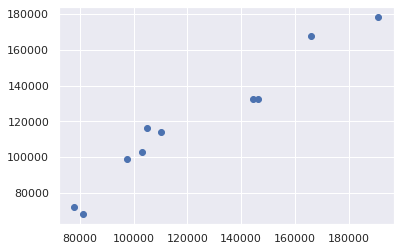

In [49]:
plt.scatter(y_test, y_pred)
plt.show()